In [1]:
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
from xgcm import Grid
import cmocean.cm as cmo
import glob

In [34]:
# date = 83385
date_file_path = '/g/data/fu5/deg581/Nowcast-analysis-devel/data/raw/datefile.txt'
base_dir = '/g/data/fu5/eac/NOWCAST/output/'
out_dir = '/g/data/fu5/deg581/OSSE_analysis/'

In [46]:
# load date value
datefile = open(date_file_path,'r') 
test_lines = datefile.readlines() 
datefile.close() 
date= int(float(test_lines[0].rstrip())*10)

# make file pathnames
roms_file = (glob.glob(base_dir+'his_*_'+str(date)+'.nc'))[0]
omaps_file = (glob.glob(base_dir+'omaps_'+str(date)+'.nc'))[0]

#open ROMS data
roms = xr.open_dataset(roms_file)
# open OMAPS data
omaps = xr.open_dataset(omaps_file)


In [47]:
base_dir+'his_*_'+str(date)+'.nc'

'/g/data/fu5/eac/NOWCAST/output/his_*_83385.nc'

In [5]:
# roms.ocean_time

In [6]:
# omaps

In [7]:
roms.lat_rho[0,-1]

<xarray.DataArray 'lat_rho' ()>
array(-41.545855)
Coordinates:
    lon_rho  float64 ...
    lat_rho  float64 ...
Attributes:
    long_name:      latitude of RHO-points
    units:          degree_north
    standard_name:  latitude
    field:          lat_rho, scalar

In [8]:
roms.lon_rho[0,0],roms.lon_rho[0,-1]

(<xarray.DataArray 'lon_rho' ()>
 array(147.1)
 Coordinates:
     lon_rho  float64 ...
     lat_rho  float64 ...
 Attributes:
     long_name:      longitude of RHO-points
     units:          degree_east
     standard_name:  longitude
     field:          lon_rho, scalar,
 <xarray.DataArray 'lon_rho' ()>
 array(158.032047)
 Coordinates:
     lon_rho  float64 ...
     lat_rho  float64 ...
 Attributes:
     long_name:      longitude of RHO-points
     units:          degree_east
     standard_name:  longitude
     field:          lon_rho, scalar)

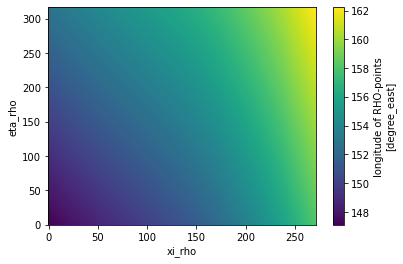

In [9]:
roms.lon_rho.plot()

In [20]:
str(time.values)[0:16]

'2022-11-05T12:00'

<Figure size 432x288 with 0 Axes>

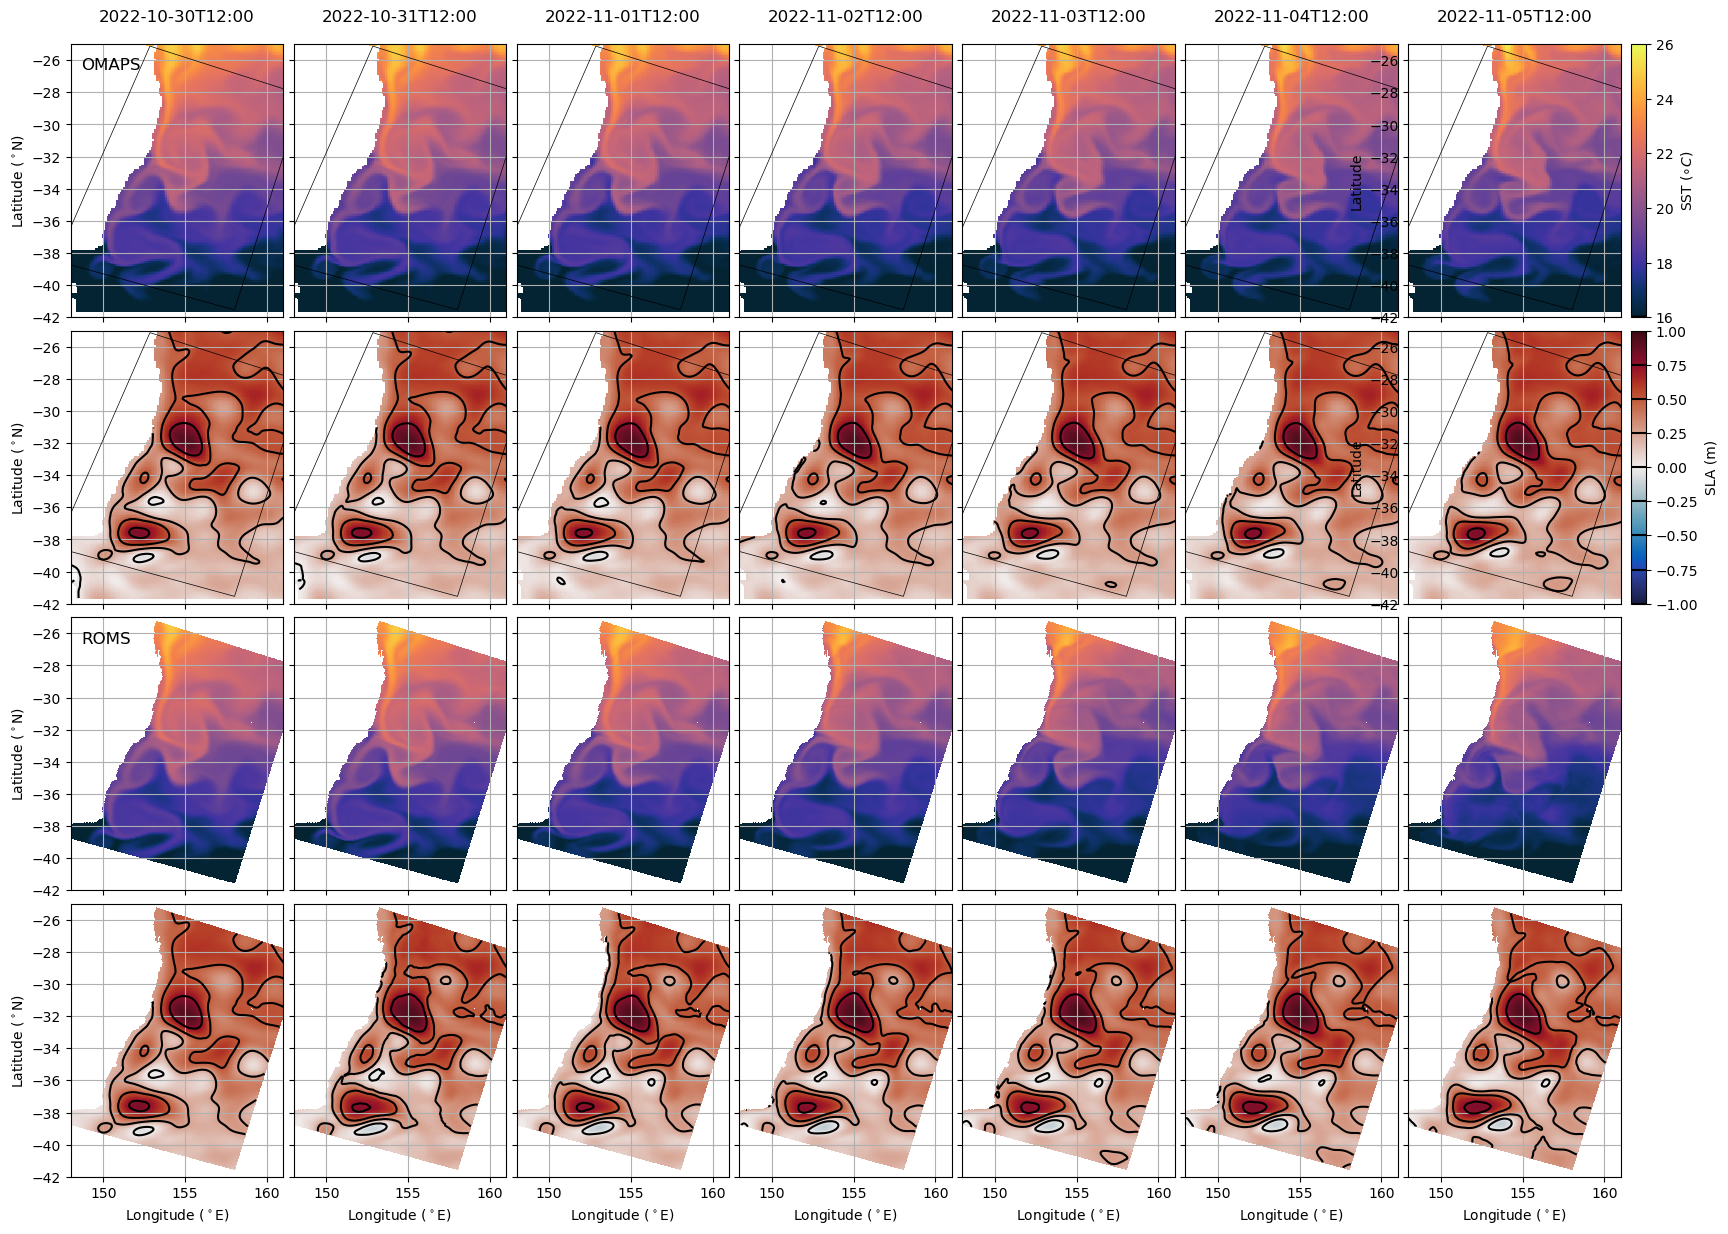

In [37]:

gs = gridspec.GridSpec(nrows=4,ncols=7,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[20,15],dpi=100)
ax = None


tlims=(16,26)
hlims=(-1,1)
sst_pcol_kwargs={'cmap':'cmo.thermal','vmin':tlims[0],'vmax':tlims[1]}
ssh_pcol_kwargs={'cmap':'cmo.balance','vmin':hlims[0],'vmax':hlims[1]}

ax_extent=np.array([148, 161, -42, -25])

for col,time in enumerate(omaps.time):
    for row in np.arange(0,4):
        if row==0:
            ax = fig.add_subplot(gs[row,col])
            im=omaps.temp.isel(depth=0).sel(time=time).plot(ax=ax,add_colorbar=False,**sst_pcol_kwargs)
            ax.plot(np.array([roms.lon_rho[0,0],roms.lon_rho[-1,0],roms.lon_rho[-1,-1],roms.lon_rho[0,-1],roms.lon_rho[0,0]]),np.array([roms.lat_rho[0,0],roms.lat_rho[-1,0],roms.lat_rho[-1,-1],roms.lat_rho[0,-1],roms.lat_rho[0,0]]),color='k',linewidth=0.5)
            ax.set_title('')
            ax.axis(ax_extent)
            ax.grid()
            ax.set_xlabel('')
            ax.set_xticklabels('')
            ax.text(0.5, 1.1, str(time.values)[0:16], fontsize=12, va='center', ha='center', rotation='horizontal', transform=ax.transAxes)
            if col==0:
                ax.set_ylabel('Latitude ($^\circ$N)')
                ax.text(.05, .95,'OMAPS', fontsize=12, va='top', ha='left', rotation='horizontal', transform=ax.transAxes)
            elif col==6:
                cax = inset_axes(ax,width="7%",height="100%",loc='lower left',
                 bbox_to_anchor=(1.05,0, 1, 1),bbox_transform=ax.transAxes,borderpad=0)
                cbar = fig.colorbar(im, cax=cax)
                cbar.ax.set_ylabel('SST ($\circ C$)')
                cbar.add_lines(co)
            else:
                ax.set_ylabel('')
                ax.set_yticklabels('')
        if row==2:
            ax = fig.add_subplot(gs[row,col])
            roms.temp.isel(s_rho=-1).sel(ocean_time=time).plot(x='lon_rho',y='lat_rho',ax=ax,add_colorbar=False,**sst_pcol_kwargs)
            ax.set_title('')
            ax.axis(ax_extent)
            ax.grid()
            ax.set_xlabel('')
            ax.set_xticklabels('')
            if col==0:
                ax.set_ylabel('Latitude ($^\circ$N)')
                ax.text(.05, .95,'ROMS', fontsize=12, va='top', ha='left', rotation='horizontal', transform=ax.transAxes)          
            else:
                ax.set_ylabel('')
                ax.set_yticklabels('')
        if row==1:
            ax = fig.add_subplot(gs[row,col])
            im=omaps.zeta.sel(time=time).plot(ax=ax,add_colorbar=False,**ssh_pcol_kwargs)
            co=ax.contour(omaps.lon,omaps.lat,omaps.zeta.sel(time=time),colors='k',levels=np.arange(-1,1.25,.25))
            ax.plot(np.array([roms.lon_rho[0,0],roms.lon_rho[-1,0],roms.lon_rho[-1,-1],roms.lon_rho[0,-1],roms.lon_rho[0,0]]),np.array([roms.lat_rho[0,0],roms.lat_rho[-1,0],roms.lat_rho[-1,-1],roms.lat_rho[0,-1],roms.lat_rho[0,0]]),color='k',linewidth=0.5)
            ax.set_title('')
            ax.axis(ax_extent)
            ax.grid()
            ax.set_xlabel('')
            ax.set_xticklabels('')
            if col==0:
                ax.set_ylabel('Latitude ($^\circ$N)')
            elif col==6:
                cax = inset_axes(ax,width="7%",height="100%",loc='lower left',
                 bbox_to_anchor=(1.05,0, 1, 1),bbox_transform=ax.transAxes,borderpad=0)
                cbar = fig.colorbar(im, cax=cax)
                cbar.ax.set_ylabel('SLA (m)')
                cbar.add_lines(co)  
            else:
                ax.set_ylabel('')
                ax.set_yticklabels('')
        if row==3:
            ax = fig.add_subplot(gs[row,col])
            roms.zeta.sel(ocean_time=time).plot(x='lon_rho',y='lat_rho',ax=ax,add_colorbar=False,**ssh_pcol_kwargs)
            ax.contour(roms.lon_rho,roms.lat_rho,roms.zeta.sel(ocean_time=time),colors='k',levels=np.arange(-1,1.25,.25))
            ax.set_title('')
            ax.axis(ax_extent)
            ax.grid()
            ax.set_xlabel('')
            ax.set_xlabel('Longitude ($^\circ$E)')
            if col==0:
                ax.set_ylabel('Latitude ($^\circ$N)')
            else:
                ax.set_ylabel('')
                ax.set_yticklabels('')
# plt.savefig(out_dir+str(date)+'.png',transparent=None)
